In [15]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import requests
import pandas as pd


The model takes input imags of size 16x16, however our images are not of that size

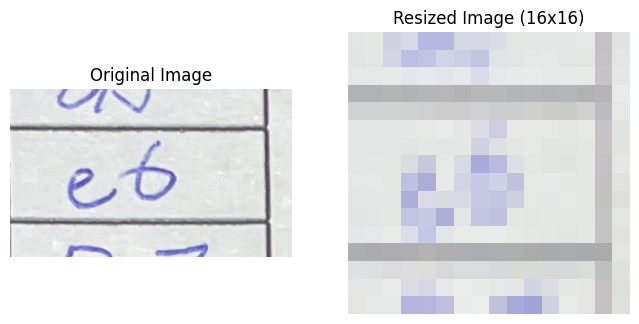

In [12]:
# Load the original image
original_image = Image.open("chessreaderdata/images/136.png")

# Resize the image to 16x16
resized_image = original_image.resize((16, 16))

# Display the original and resized images
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Plot the original image
axes[0].imshow(original_image)
axes[0].set_title("Original Image")
axes[0].axis('off')

# Plot the resized image
axes[1].imshow(resized_image)
axes[1].set_title("Resized Image (16x16)")
axes[1].axis('off')

# Show the plot
plt.show()


In [6]:
processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-handwritten')
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-handwritten')

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [24]:
# Load your dataset
dataset_path = 'chessreaderdata/prediciton.csv'
prediction = pd.read_csv(dataset_path)

In [32]:
import pandas as pd
import os

# Assuming you have a DataFrame called 'predictions' with a 'id' column
# and a folder with image paths called 'chessreaderdata/images'

# Extracting IDs from image paths
image_folder_path = 'chessreaderdata/images'
image_files = os.listdir(image_folder_path)

# Extracting IDs from file names and sorting them
id_list = sorted([int(os.path.splitext(file)[0]) for file in image_files])

# Creating a mapping between the original 'id' column values and the new IDs
id_mapping = dict(zip(prediction['id'], id_list))

# Reindexing the 'id' column in the DataFrame based on the new IDs
prediction['id'] = prediction['id'].map(id_mapping)

# Now, the 'id' column in 'predictions' is modified to match the image IDs


In [33]:
prediction

,id,gameId,turnNumber,number,move_state,confidence,gl,gl2,az,rk,ab,prediction,id.1,width,height,mimetype
0,131,3,1,0,valid,0.998267,Nf3,Nf3,NF3,Nf3,Nf3,Nf3,131,300,177,image/png
1,132,3,1,1,valid,0.999023,Nf6,Nf6,Nf6,Nf6,Nf6,Nf6,132,295,177,image/png
2,133,3,2,2,valid,0.985127,93,93,93,93,g3,g3,133,294,176,image/png
3,134,3,2,3,valid,0.953389,015,015,05,d5,d5,d5,134,294,176,image/png
4,135,3,3,4,valid,0.999999,Bg2,Bg2,Bg2,Bg2,Bg2,Bg2,135,294,176,image/png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1614,5505,146,2,2,valid,0.983175,c4,c4,C4,c4,e4,c4,5505,504,207,image/jpeg
1615,5506,146,2,3,valid,0.995575,c'5,c'5,C'5,c's,c5,c5,5506,507,207,image/jpeg
1616,5507,146,3,4,valid,0.999998,d5,d5,d5,d5,d5,d5,5507,504,207,image/jpeg
1617,5508,146,3,5,valid,0.998293,bs,bs,b5,b5,b5 1,b5,5508,505,208,image/jpeg


In [38]:
import pandas as pd
from PIL import Image

# Iterate through the first 10 rows and perform evaluation
for index, row in prediction.head(50).iterrows():
    # Extract relevant information from the row
    image_id = row['id']
    image_path = f'chessreaderdata/images/{image_id}.png'
    # Add more information as needed

    # Load the image
    image = Image.open(image_path).convert("RGB")

    # Process the image with the pre-trained model
    pixel_values = processor(images=image, return_tensors="pt").pixel_values
    generated_ids = model.generate(pixel_values)
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

    # Compare the generated text with the actual label and assess performance
    actual_label = row['prediction']
    # Add your evaluation metrics or criteria here
    print("actual label : ", actual_label)
    print("predicted : ", generated_text)


actual label :  Nf3
predicted :  inf3 )
actual label :  Nf6
predicted :  I N.F.6
actual label :  g3
predicted :  1,63.
actual label :  d5
predicted :  jobs,
actual label :  Bg2
predicted :  B92 )
actual label :  e6
predicted :  est,
actual label :  O-O
predicted :  to-o.
actual label :  Be7
predicted :  f Bez
actual label :  d3
predicted :  1 023.
actual label :  O-O
predicted :  to-o
actual label :  Nbd2
predicted :  in brief.
actual label :  c5
predicted :  jobs,
actual label :  e4
predicted :  leafy
actual label :  Nc6
predicted :  jacks.
actual label :  Re1
predicted :  rein.
actual label :  b5
predicted :  65.
actual label :  e5
predicted :  1st
actual label :  Nd7
predicted :  fivaz 7
actual label :  Nf1
predicted :  infi
actual label :  Qc7
predicted :  facy
actual label :  Bf4
predicted :  1.1374
actual label :  Bb7
predicted :  troy,
actual label :  h4
predicted :  ing to
actual label :  Rfc8
predicted :  tries.
actual label :  N1h2
predicted :  wy.
actual label :  Qd8
predict